In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_circles
n_samples = 1000
X,y = make_circles(n_samples,noise=0.03,random_state=42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
X.shape

(1000, 2)

In [ ]:
y.shape

(1000,)

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:,0],
                       "X1": X[:,1],
                       "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


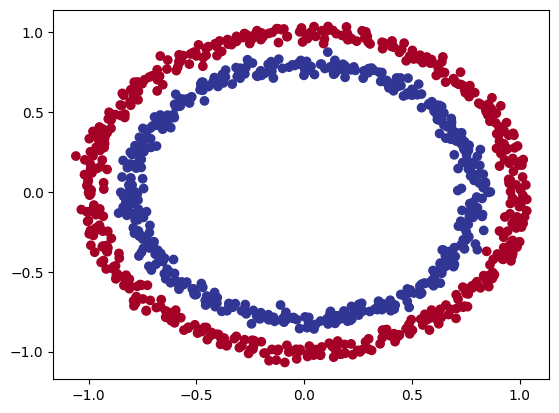

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tf.random.set_seed(42)

In [ ]:
len(X_train),  len(X_test),  len(y_train),  len(y_test)

(800, 200, 800, 200)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation=None)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(X_train, y_train, epochs=100, verbose=1)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6044 - mae: 0.6044   
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5030 - mae: 0.5030  
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5030 - mae: 0.5030  
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5037 - mae: 0.5037  
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5021 - mae: 0.5021  
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5021 - mae: 0.5021 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5028 - mae: 0.5028  
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5016 - mae: 0.5016 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5013 - mae: 0.5013  
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5018 - mae: 0.5018  
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5008 - mae: 0.5008 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5011 - mae: 0.5011 
Epoch 13/100
25/

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation='sigmoid'),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(1)
])

model1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
               metrics=["mae"])

model1.fit(X_train, y_train, epochs=100, verbose=0)
mae_test1 = model1.evaluate(X_test, y_test)
print(f"Modelle Test: {mae_test1}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0240 - mae: 0.0240  
Modelle Test: [0.02463732287287712, 0.02463732287287712]


In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.1,),
               metrics=["mae"])

model2.fit(X_train, y_train, epochs=100, verbose=1)
mae_test3 = model1.evaluate(X_test, y_test)
print(f"Modelle Test: {mae_test3}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5106 - mae: 0.5106   
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4798 - mae: 0.4798 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4343 - mae: 0.4343 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4127 - mae: 0.4127  
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3566 - mae: 0.3566 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3348 - mae: 0.3348 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3546 - mae: 0.3546 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3766 - mae: 0.3766 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3319 - mae: 0.3319 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3255 - mae: 0.3255 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2639 - mae: 0.2639 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2731 - mae: 0.2731 
Epoch 13/100
25/25 ━━━

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.1,),
               metrics=["accuracy"])

model2.fit(X_train, y_train, epochs=100, verbose=1)
mae_test2 = model1.evaluate(X_test, y_test)
print(f"Modelle Test: {mae_test2}")

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4905 - loss: 0.5176   
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5051 - loss: 0.4883 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5488 - loss: 0.4575 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6212 - loss: 0.4130 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7350 - loss: 0.3838 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7239 - loss: 0.3875 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7336 - loss: 0.3718 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6918 - loss: 0.3743 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7673 - loss: 0.3340 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8469 - loss: 0.3057 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6752 - loss: 0.3655 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


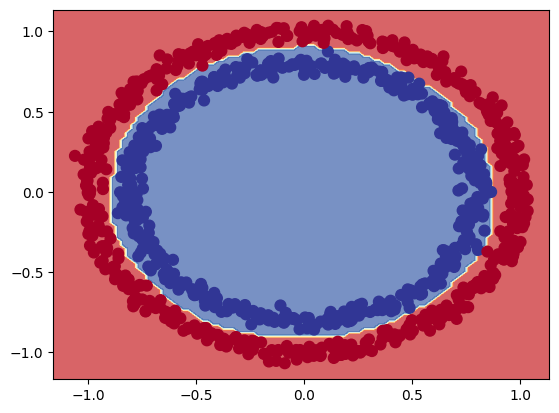

In [ ]:
def plot_decision_boundary(mae_test3, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    x_in = np.c_[xx.ravel(), yy.ravel()]


    y_pred = mae_test3.predict(x_in)

    if len(y_pred[0]) > 1:
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()


plot_decision_boundary(model1, X, y)
